In [45]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

np.random.seed(1)
beta = np.array([-1.5,2])
input_range = np.linspace(-1,1,100)
X = np.vstack([np.ones(100), input_range]).T
y = X @ beta + np.random.normal(0, 0.3, 100)
y[80] = 10
def calculate_laplacian_loss(parameters, X, y):
    return np.sum(np.abs(y - X @ parameters))

params = np.array([1,1])
beta_hat_gaussian = np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat_laplacian = minimize(
    calculate_laplacian_loss,
    x0=beta_hat_gaussian,
    args=(X, y),
    method="Nelder-Mead"
)

print('Beta hat para erros Gaussianos: ',beta_hat_gaussian)
print('Beta hat para erros Laplacianos: \n',beta_hat_laplacian)

Beta hat para erros Gaussianos:  [-1.37848139  2.2368733 ]
Beta hat para erros Laplacianos: 
        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 30.729895340268403
             x: [-1.498e+00  2.082e+00]
           nit: 36
          nfev: 70
 final_simplex: (array([[-1.498e+00,  2.082e+00],
                       [-1.498e+00,  2.082e+00],
                       [-1.498e+00,  2.082e+00]]), array([ 3.073e+01,  3.073e+01,  3.073e+01]))


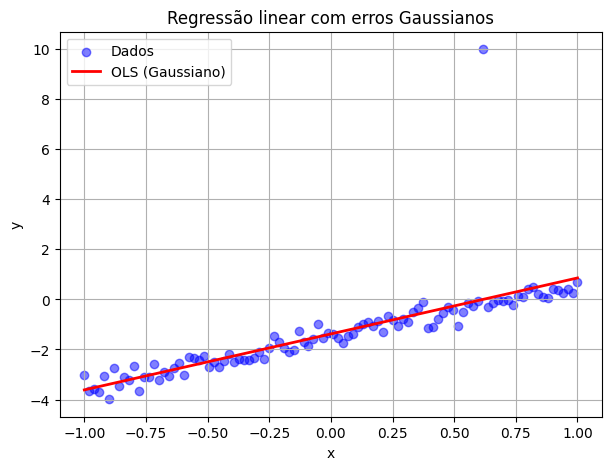

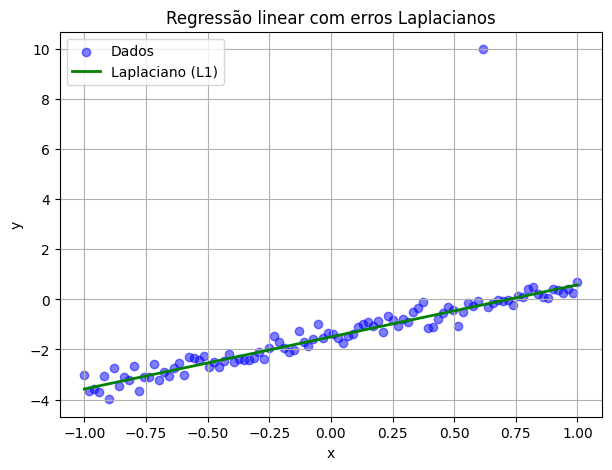

In [49]:
plt.figure(figsize=(7,5))

plt.title('Regressão linear com erros Gaussianos')
plt.scatter(input_range, y, alpha=0.5, label="Dados", color = 'blue')

y_hat_gaussian = X @ beta_hat_gaussian

plt.plot(input_range, y_hat_gaussian, label="OLS (Gaussiano)", linewidth=2, color = 'red')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize=(7,5))

plt.title('Regressão linear com erros Laplacianos')
plt.scatter(input_range, y, alpha=0.5, label="Dados", color = 'blue')

y_hat_laplacian = X @ beta_hat_laplacian.x

plt.plot(input_range, y_hat_laplacian, label="Laplaciano (L1)", linewidth=2, linestyle="-", color = 'green')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.show()


In [47]:
erro_gaussian = np.sum((beta - beta_hat_gaussian)**2)
erro_laplacian = np.sum((beta - beta_hat_laplacian['x'])**2)

print('Erro quadrático para beta calculado com erros gaussianos  = ', erro_gaussian)
print('Erro quadrático para beta calculado com erros laplacianos = ', erro_laplacian)

Erro quadrático para beta calculado com erros gaussianos  =  0.07087573216817813
Erro quadrático para beta calculado com erros laplacianos =  0.006784102400615049
